In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the ZIP file in Google Drive
zip_file_path = '/content/drive/MyDrive/DL _MinProject/Plant disease detection  Dataset.zip'
extracted_path = '/content/Plant_Disease_Dataset'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Verify the extraction
extracted_files = os.listdir(extracted_path)
print(f'Extracted files: {extracted_files}')


Extracted files: ['Plant disease detection  Dataset', '__MACOSX']


In [ ]:
dataset_path = '/content/Plant_Disease_Dataset/Plant disease detection  Dataset'
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Define ImageDataGenerator for training and validation with enhanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,



    validation_split=0.2  # Splitting 80% for training and 20% for validation
)


In [ ]:
# Define ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',  # assuming binary classification (Diseased vs Healthy)
    subset='training'  # specify this is the training set
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # specify this is the validation set
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 329 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification output
])



In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
10/10 [==============================] - 55s 6s/step - loss: 0.4937 - accuracy: 0.8788 - val_loss: 0.4062 - val_accuracy: 0.8750
Epoch 2/20
10/10 [==============================] - 53s 5s/step - loss: 0.3750 - accuracy: 0.8855 - val_loss: 0.3141 - val_accuracy: 0.9062
Epoch 3/20
10/10 [==============================] - 56s 6s/step - loss: 0.3239 - accuracy: 0.8875 - val_loss: 0.3141 - val_accuracy: 0.9219
Epoch 4/20
10/10 [==============================] - 54s 5s/step - loss: 0.2488 - accuracy: 0.8923 - val_loss: 0.3861 - val_accuracy: 0.8594
Epoch 5/20
10/10 [==============================] - 55s 5s/step - loss: 0.1868 - accuracy: 0.9091 - val_loss: 0.3312 - val_accuracy: 0.9062
Epoch 6/20
10/10 [==============================] - 53s 5s/step - loss: 0.1823 - accuracy: 0.8956 - val_loss: 0.3857 - val_accuracy: 0.8281
Epoch 7/20
10/10 [==============================] - 56s 6s/step - loss: 0.1584 - accuracy: 0.9125 - val_loss: 0.3504 - val_accuracy: 0.8281
Epoch 8/20
10/10 [==

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


13/13 [==============================] - 17s 1s/step - loss: 0.1712 - accuracy: 0.9000
Test Accuracy: 90.00%


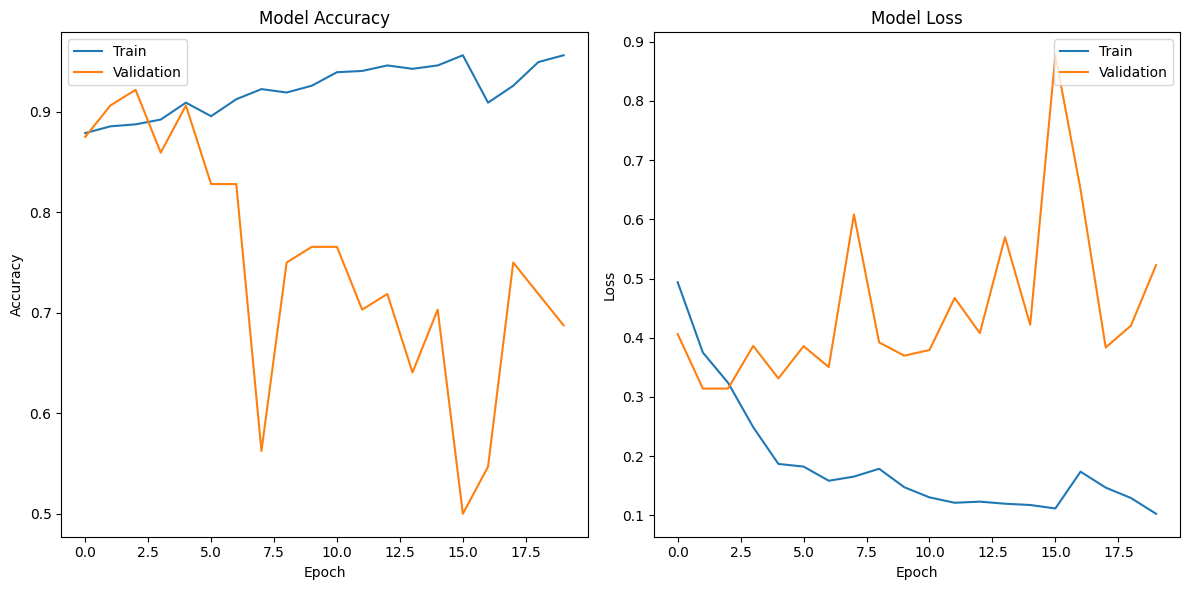

13/13 [==============================] - 16s 1s/step - loss: 0.1712 - accuracy: 0.9000
Test Accuracy: 90.00%


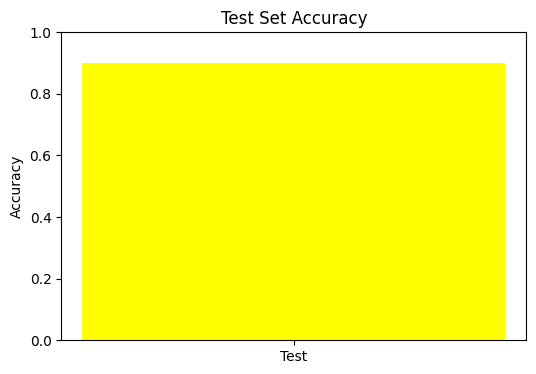

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate on test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Optionally, plot test set metrics
test_loss, test_accuracy = loss, accuracy  # already evaluated above

plt.figure(figsize=(6, 4))
plt.bar(['Test'], [test_accuracy], color=['yellow'])
plt.title('Test Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [ ]:
# Final epoch metrics
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

# Average training accuracy over 20 epochs
average_training_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Average validation accuracy over 20 epochs
average_validation_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

# Evaluate on test set
loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print all metrics
print(f'Training Accuracy (Final Epoch): {final_training_accuracy * 100:.2f}%')
print(f'Validation Accuracy (Final Epoch): {final_validation_accuracy * 100:.2f}%')
print(f'Average Training Accuracy (20 Epochs): {average_training_accuracy * 100:.2f}%')
print(f'Average Validation Accuracy (20 Epochs): {average_validation_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

13/13 [==============================] - 25s 2s/step - loss: 0.1712 - accuracy: 0.9000
Test Accuracy: 90.00%
Training Accuracy (Final Epoch): 95.63%
Validation Accuracy (Final Epoch): 68.75%
Average Training Accuracy (20 Epochs): 92.20%
Average Validation Accuracy (20 Epochs): 74.69%
Test Accuracy: 90.00%
